# Snapshot Graphs
Instantaneous shift and transmission graphs 

In [44]:
from AD_analysis import *
import Atmospheric_diffraction as atm_shift

## Snapshot Shifts over Observation
#### Wavelength vs Displacement for various airmasses, and Displacement vs Airmass for various wavelengths
Can use either HA or ZA for airmasses

Zenith Angles Used


/opt/anaconda3/envs/astrocondatest/lib/python3.7/site-packages/ipykernel_launcher.py:96: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


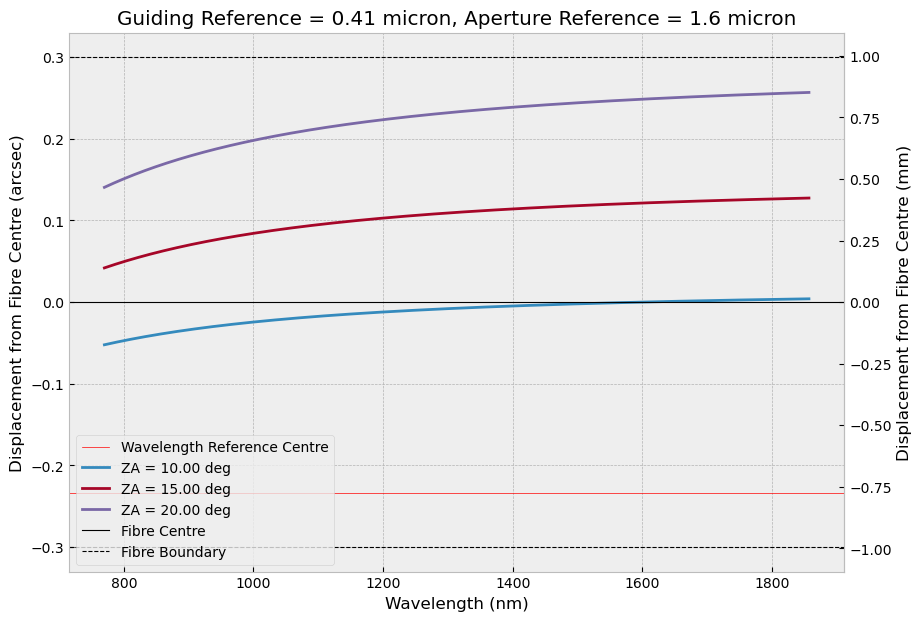

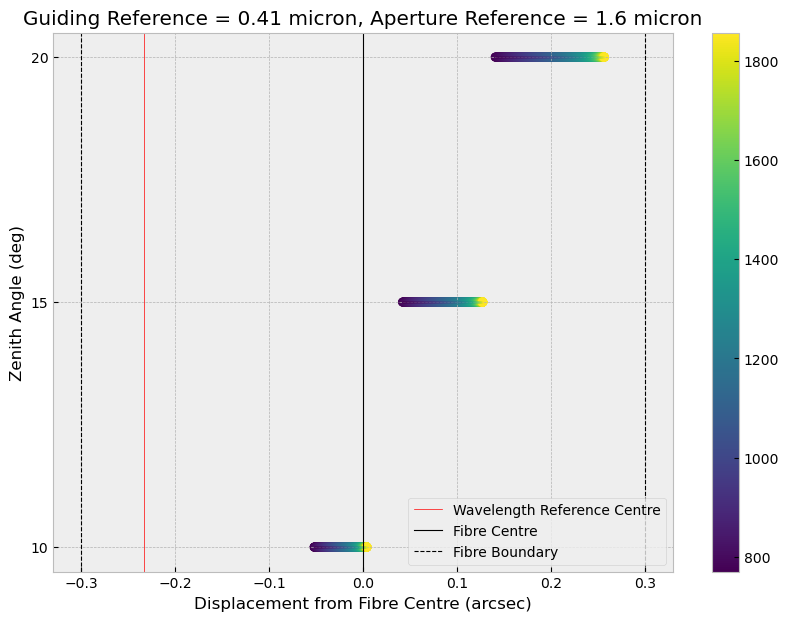

In [45]:
def shift_plot_v0(input_parameters,output_parameters,conditions):
    if input_parameters['HA_range'] != []: #If plot is True and HA values are used, plot the 2 graphs
        HA_range=input_parameters['HA_range']
        HA_to_ZA_range=atm_diff.HA_2_ZA(HA_range,input_parameters['targ_dec'])
        print(HA_to_ZA_range)
        #1) wavelength vs displacement for different HA 
        centre_shift=atm_diff.diff_shift(input_parameters['fibrecentre_waveref'],output_parameters['airmasses'][0],input_parameters['guide_waveref'],conditions)
        T_arc = lambda T_mm: T_mm * analysis.plate_scale
        T_mm = lambda T_arc: T_arc / analysis.plate_scaless
        fig, ax = plt.subplots(figsize=(10,7))
        ax2 = ax.secondary_yaxis("right", functions=(T_arc, T_mm))
        if input_parameters['reposition'] == False: #If repositioned, wavelength reference centre is meaningless as relative position changes
            plt.axhline(-centre_shift.value,linewidth=0.5,color='red', label='Wavelength Reference Centre')
        for i in range(0,len(output_parameters['airmasses'])):
            plt.plot(output_parameters['wave_wavelengths'],output_parameters['shifts'][i],label="HA = %2.2fh" %(HA_range[i]))
        plt.axhline(0,linewidth=0.8,color='black',label='Fibre Centre')
        plt.axhline(output_parameters['fibre_diameter'].value/2,linewidth=0.8,color='black',label='Fibre Boundary',linestyle='--')
        plt.axhline(-output_parameters['fibre_diameter'].value/2,linewidth=0.8,color='black',linestyle='--')
        plt.title('Wavelength Reference %s, Fibre Centre on %s, Dec = %2.2f deg' %(input_parameters['guide_waveref'],input_parameters['fibrecentre_waveref'],input_parameters['targ_dec'].value))
        plt.legend(loc='best')

        ax.set_ylabel('Displacement from Fibre Centre (arcsec)')
        ax2.set_ylabel('Displacement from Fibre Centre (mm)')
        ax.set_xlabel('Wavelength (nm)')

        #2) Displacement vs HA for different wavelengths
        to_HA = lambda ZA_vals: atm_diff.ZA_2_HA(ZA_vals,input_parameters['targ_dec'])
        to_ZA = lambda HA_vals: atm_diff.HA_2_ZA(HA_vals,input_parameters['targ_dec'])
        fig, ax = plt.subplots(figsize=(12,7))
        ax2 = ax.secondary_yaxis("right", functions=(to_ZA, to_HA))
        if input_parameters['reposition'] == False: #If repositioned, wavelength reference centre is meaningless as relative position changes
            plt.axvline(-centre_shift.value,linewidth=0.5,color='red',label='Guiding Reference')
        xvals=np.linspace(-1,1,len(output_parameters['wave_wavelengths']))
        c=np.tan(xvals)
        for i in range(0,len(output_parameters['shifts'])):
            yvals=np.full(len(output_parameters['shifts'][i]),HA_range[i])
            plt.scatter(output_parameters['shifts'][i],yvals,c=c)
            norm = plt.Normalize(output_parameters['wave_wavelengths'].value.min(), output_parameters['wave_wavelengths'].value.max())
            points = np.array([output_parameters['shifts'][i], yvals]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            lc = LineCollection(segments, cmap='viridis', norm=norm)
            lc.set_array(output_parameters['wave_wavelengths'].value)
            lc.set_linewidth(2)
            line=ax.add_collection(lc)
        fig.colorbar(line)
        plt.axvline(0,linewidth=0.7,color='black',label='Aperture Centre')
        plt.axvline(output_parameters['fibre_diameter'].value/2,linewidth=0.8,color='black',label='Aperture Boundary',linestyle='--')
        plt.axvline(-output_parameters['fibre_diameter'].value/2,linewidth=0.8,color='black',linestyle='--')
        plt.xlabel('Displacement from Aperture Centre (arcsec)')
        plt.ylabel('Hour Angle (h)')
        ax2.set_ylabel("Zenith Angle (deg)")
        plt.yticks(np.linspace(min(HA_range),max(HA_range),len(HA_range)))
        plt.legend()
        plt.title('Guiding Reference = %s, Aperture Centre = %s, Dec = %2.2f deg' %(input_parameters['guide_waveref'],input_parameters['fibrecentre_waveref'],input_parameters['targ_dec'].value))    
  
    #ZA PLOTS
    if input_parameters['ZA_range'] != []: #If plot is True and Zenith Angle values are used, plot the 2 graphs
        ZA_range=input_parameters['ZA_range']

        #1) wavelength vs displacement for different HA 
        centre_shift=atm_diff.diff_shift(input_parameters['fibrecentre_waveref'],output_parameters['airmasses'][0],input_parameters['guide_waveref'],conditions)
        T_arc = lambda T_mm: T_mm * analysis.plate_scale
        T_mm = lambda T_arc: T_arc / analysis.plate_scale
        fig, ax = plt.subplots(figsize=(10,7))
        ax2 = ax.secondary_yaxis("right", functions=(T_arc, T_mm))
        if input_parameters['reposition'] == False: #If repositioned, wavelength reference centre is meaningless as relative position changes
            plt.axhline(-centre_shift.value,linewidth=0.5,color='red', label='Wavelength Reference Centre')
        for i in range(0,len(output_parameters['airmasses'])):
            plt.plot(output_parameters['wave_wavelengths'],output_parameters['shifts'][i],label="ZA = %2.2f deg" %(ZA_range[i]))
        plt.axhline(0,linewidth=0.8,color='black',label='Fibre Centre')
        plt.axhline(output_parameters['fibre_diameter'].value/2,linewidth=0.8,color='black',label='Fibre Boundary',linestyle='--')
        plt.axhline(-output_parameters['fibre_diameter'].value/2,linewidth=0.8,color='black',linestyle='--')
        plt.legend(loc='best')
        ax.set_ylabel('Displacement from Fibre Centre (arcsec)')
        ax2.set_ylabel('Displacement from Fibre Centre (mm)')
        ax.set_xlabel('Wavelength (nm)')
        plt.title('Guiding Reference = %s, Aperture Reference = %s' %(input_parameters['guide_waveref'],input_parameters['fibrecentre_waveref']))

        #2) Displacement vs ZA for different wavelengths
        fig, ax = plt.subplots(figsize=(10,7))

        if input_parameters['reposition'] == False: #If repositioned, wavelength reference centre is meaningless as relative position changes
            plt.axvline(-centre_shift.value,linewidth=0.5,color='red',label='Wavelength Reference Centre')
        xvals=np.linspace(-1,1,len(output_parameters['wave_wavelengths']))
        c=np.tan(xvals)
        for i in range(0,len(output_parameters['shifts'])):
            yvals=np.full(len(output_parameters['shifts'][i]),ZA_range[i])
            plt.scatter(output_parameters['shifts'][i],yvals,c=c)
            norm = plt.Normalize(output_parameters['wave_wavelengths'].value.min(), output_parameters['wave_wavelengths'].value.max())
            points = np.array([output_parameters['shifts'][i], yvals]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            lc = LineCollection(segments, cmap='viridis', norm=norm)
            lc.set_array(output_parameters['wave_wavelengths'].value)
            lc.set_linewidth(2)
            line=ax.add_collection(lc)
        fig.colorbar(line)
        plt.axvline(0,linewidth=0.8,color='black',label='Fibre Centre')
        plt.axvline(output_parameters['fibre_diameter'].value/2,linewidth=0.8,color='black',label='Fibre Boundary',linestyle='--')
        plt.axvline(-output_parameters['fibre_diameter'].value/2,linewidth=0.8,color='black',linestyle='--')
        plt.xlabel('Displacement from Fibre Centre (arcsec)')
        plt.ylabel('Zenith Angle (deg)')
        plt.yticks(np.linspace(min(ZA_range),max(ZA_range),len(ZA_range)))
        plt.legend()
        plt.title('Guiding Reference = %s, Aperture Reference = %s' %(input_parameters['guide_waveref'],input_parameters['fibrecentre_waveref']))

analysis=AD_analysis()
# analysis.load_airmasses(HA_range=[0,1,2,3],targ_dec=10 * u.deg)
analysis.load_airmasses(ZA_range=[10,15,20],targ_dec=10 * u.deg)
analysis.load_wave("LR","NIR","IY","H",sampling=1*u.nm)
analysis.calculate_shifts(fibrecentre_waveref = 1.6 * u.micron,reposition=False,guide_waveref=0.41*u.micron)
input_parameters=analysis.input_parameters
output_parameters=analysis.output_parameters
conditions=analysis.conditions
shift_plot_v0(input_parameters,output_parameters,conditions)

#### (Better graphs) Displacement vs Airmass for various wavelengths
Only works for HA, but converts to ZA and plots scale too

In [75]:
def shift_plot_v1(input_parameters,output_parameters,conditions): #SINGLE OBSERVATION SNAPSHOT
    HA_range=input_parameters['HA_range']
    HA_to_ZA_range=atm_diff.HA_2_ZA(HA_range,input_parameters['targ_dec'])

    centre_shift=atm_diff.diff_shift(input_parameters['fibrecentre_waveref'],output_parameters['airmasses'][0],input_parameters['guide_waveref'],conditions)
    T_arc = lambda T_mm: T_mm * analysis.plate_scale
    T_mm = lambda T_arc: T_arc / analysis.plate_scale

    to_HA = lambda ZA_vals: atm_diff.ZA_2_HA(ZA_vals,input_parameters['targ_dec'])
    to_ZA = lambda HA_vals: atm_diff.HA_2_ZA(HA_vals,input_parameters['targ_dec'])
    fig, [ax, ax3] = plt.subplots(1,2, figsize=(10,4),gridspec_kw=dict(width_ratios=[10,.2]))    
    ax2 = ax.secondary_yaxis("right", functions=(to_ZA, to_HA))
    if input_parameters['reposition'] == False and analysis.input_parameters['fibrecentre_waveref'] != analysis.input_parameters['guide_waveref']: #If repositioned, wavelength reference centre is meaningless as relative position changes
        plt.axvline(-centre_shift.value,linewidth=0.5,color='red',label='Guiding Wavelength Position')
    xvals=np.linspace(-1,1,len(output_parameters['wave_wavelengths']))
    c=np.tan(xvals)
    for i in range(0,len(output_parameters['shifts'])):
        yvals=np.full(len(output_parameters['shifts'][i]),HA_range[i])
        ax.scatter(output_parameters['shifts'][i],yvals,c=c,cmap='inferno')
        norm = plt.Normalize(output_parameters['wave_wavelengths'].value.min(), output_parameters['wave_wavelengths'].value.max())
        points = np.array([output_parameters['shifts'][i], yvals]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = LineCollection(segments, cmap='inferno', norm=norm)
        lc.set_array(output_parameters['wave_wavelengths'].value)
        lc.set_linewidth(2)
        line=ax.add_collection(lc)
    fig.colorbar(line, label='Wavelength (nm)',cax=ax3)
    ax.axvline(0,linewidth=0.7,color='black',label='Aperture Centre')
    ax.axvline(output_parameters['fibre_diameter'].value/2,linewidth=0.8,color='black',label='Aperture Boundary',linestyle='--')
    ax.axvline(-output_parameters['fibre_diameter'].value/2,linewidth=0.8,color='black',linestyle='--')
    ax.set_xlabel('Displacement from Aperture Centre (arcsec)')
    ax.set_ylabel('Hour Angle (h)')
    ax2.set_ylabel("Zenith Angle (deg)")
    ax.set_yticks(np.linspace(min(HA_range),max(HA_range),len(HA_range)))
    ax.legend()
    ax.set_title('%s %s, Guiding = %s, Aperture = %s, Dec = %2.2f' %(input_parameters['regime'], input_parameters['band'],input_parameters['guide_waveref'],input_parameters['fibrecentre_waveref'],input_parameters['targ_dec'].value))    

HA used
Target goes below Horizon above/below HA of +/- 6.0h


/opt/anaconda3/envs/astrocondatest/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
/opt/anaconda3/envs/astrocondatest/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "b_box" which is no longer supported as of 3.3 and will become an error in 3.6
  import sys
/Users/Jay.Stephan/Library/CloudStorage/OneDrive-ScienceandTechnologyFacilitiesCouncil/Documents/Work/MOSAIC/AD/AD-Code/Main-Version/Atmospheric_diffraction.py:114: RuntimeWarning: invalid value encountered in arccos
  HA = np.arccos((np.sin(alt)-np.sin(lat)*np.sin(dec))/(np.cos(lat)*np.cos(dec)))


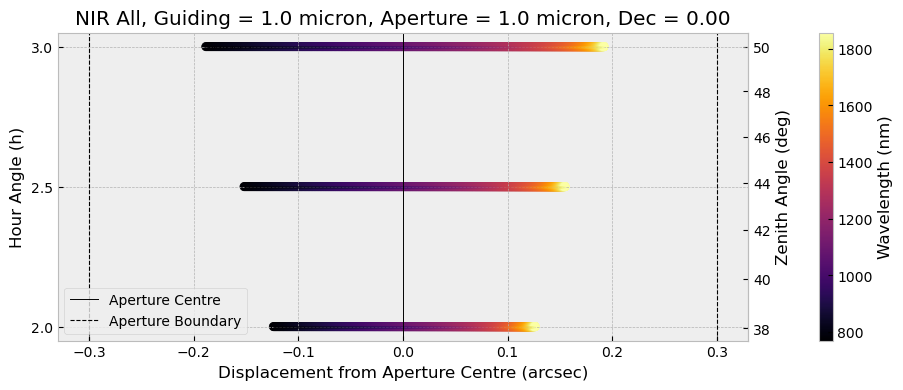

In [76]:
#SINGLE SNAPSHOT
analysis=AD_analysis()
analysis.load_airmasses(HA_range=[2,2.5,3],targ_dec=0 * u.deg)
analysis.load_wave("LR","NIR","IY","H",sampling=1*u.nm)
analysis.calculate_shifts(fibrecentre_waveref = 1 * u.micron,reposition=False,guide_waveref=1*u.micron)
shift_plot_v1(analysis.input_parameters,analysis.output_parameters,analysis.conditions)
plt.savefig("graphs/NIR_2D.png",dpi=600,b_box="tight")

HA used
Target goes below Horizon above/below HA of +/- 6.0h
HA used
Target goes below Horizon above/below HA of +/- 6.0h


/opt/anaconda3/envs/astrocondatest/lib/python3.7/site-packages/ipykernel_launcher.py:75: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
/opt/anaconda3/envs/astrocondatest/lib/python3.7/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
/opt/anaconda3/envs/astrocondatest/lib/python3.7/site-packages/ipykernel_launcher.py:90: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "b_box" which is no longer supported as of 3.3 and will become an error in 3.6


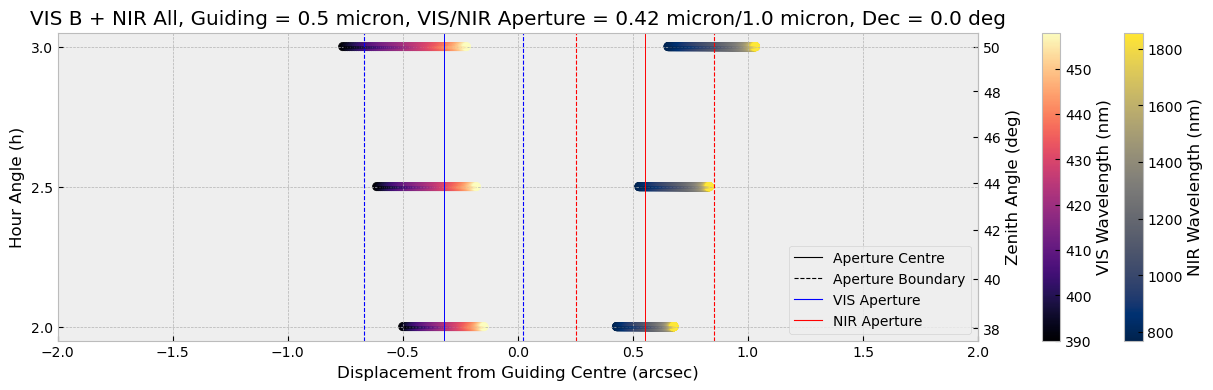

In [80]:
#PARALLEL OBSERVATIONS SNAPSHOT
HA_vals=[2,2.5,3] 
dec = 0 * u.deg
guide = .5 * u.micron
VIS_aperture=.42 * u.micron
NIR_aperture=1 * u.micron
VIS_mode=["LR","VIS","B","B"]
NIR_mode=["LR","NIR","IY","H"]

#===========================

analysis=AD_analysis()
analysis.load_airmasses(HA_range=HA_vals,targ_dec=dec ) 
analysis.load_wave(VIS_mode[0],"VIS",VIS_mode[2],VIS_mode[3],sampling=1*u.nm) 
analysis.calculate_shifts(fibrecentre_waveref = VIS_aperture,reposition=False,guide_waveref=guide)

input_parameters=analysis.input_parameters
output_parameters=analysis.output_parameters
conditions=analysis.conditions

HA_range=input_parameters['HA_range']
HA_to_ZA_range=atm_diff.HA_2_ZA(HA_range,input_parameters['targ_dec'])

centre_shift=atm_diff.diff_shift(input_parameters['fibrecentre_waveref'],output_parameters['airmasses'][0],input_parameters['guide_waveref'],conditions)
T_arc = lambda T_mm: T_mm * analysis.plate_scale
T_mm = lambda T_arc: T_arc / analysis.plate_scale

to_HA = lambda ZA_vals: atm_diff.ZA_2_HA(ZA_vals,input_parameters['targ_dec'])
to_ZA = lambda HA_vals: atm_diff.HA_2_ZA(HA_vals,input_parameters['targ_dec'])
fig, [ax, ax3, ax4] = plt.subplots(1,3, figsize=(14,4),gridspec_kw=dict(width_ratios=[10,.2,.2]))
ax2 = ax.secondary_yaxis("right", functions=(to_ZA, to_HA))

xvals=np.linspace(-1,1,len(output_parameters['wave_wavelengths']))
c=np.tan(xvals)
for i in range(0,len(output_parameters['shifts'])):
    yvals=np.full(len(output_parameters['shifts'][i]),HA_range[i])
    ax.scatter(output_parameters['shifts'][i]+centre_shift,yvals,c=c,cmap='magma')
    norm = plt.Normalize(output_parameters['wave_wavelengths'].value.min(), output_parameters['wave_wavelengths'].value.max())
    points = np.array([output_parameters['shifts'][i]+centre_shift, yvals]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap='magma', norm=norm)
    lc.set_array(output_parameters['wave_wavelengths'].value)
    lc.set_linewidth(2)
    line=ax.add_collection(lc)

ax.axvline(0+centre_shift.value,linewidth=0.7,color='blue')
ax.axvline(output_parameters['fibre_diameter'].value/2+centre_shift.value,linewidth=0.8,color='blue',linestyle='--')
ax.axvline(-output_parameters['fibre_diameter'].value/2+centre_shift.value,linewidth=0.8,color='blue',linestyle='--')
ax.set_xlabel('Displacement from Guiding Centre (arcsec)')
ax.set_ylabel('Hour Angle (h)')
ax2.set_ylabel("Zenith Angle (deg)")
ax.set_yticks(np.linspace(min(HA_range),max(HA_range),len(HA_range)))

analysis=AD_analysis()
analysis.load_airmasses(HA_range=HA_vals,targ_dec=dec ) 
analysis.load_wave(NIR_mode[0],"NIR",NIR_mode[2],NIR_mode[3],sampling=1*u.nm)
analysis.calculate_shifts(fibrecentre_waveref = NIR_aperture,reposition=False,guide_waveref=guide) 
input_parameters=analysis.input_parameters
output_parameters=analysis.output_parameters
conditions=analysis.conditions

centre_shift=atm_diff.diff_shift(input_parameters['fibrecentre_waveref'],output_parameters['airmasses'][0],input_parameters['guide_waveref'],conditions)
xvals=np.linspace(-1,1,len(output_parameters['wave_wavelengths']))
c=np.tan(xvals)
for i in range(0,len(output_parameters['shifts'])):
    yvals=np.full(len(output_parameters['shifts'][i]),HA_range[i])
    ax.scatter(output_parameters['shifts'][i]+centre_shift,yvals,c=c,cmap='cividis')
    norm = plt.Normalize(output_parameters['wave_wavelengths'].value.min(), output_parameters['wave_wavelengths'].value.max())
    points = np.array([output_parameters['shifts'][i]+centre_shift, yvals]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap='cividis', norm=norm)
    lc.set_array(output_parameters['wave_wavelengths'].value)
    lc.set_linewidth(2)
    line2=ax.add_collection(lc)
fig.colorbar(line2, label='NIR Wavelength (nm)',cax=ax4)
fig.colorbar(line, label='VIS Wavelength (nm)',cax=ax3)
ax.axvline(0+centre_shift.value,linewidth=0.7,color='red')
ax.axvline(+output_parameters['fibre_diameter'].value/2+centre_shift.value,linewidth=0.8,color='red',linestyle='--')
ax.axvline(-output_parameters['fibre_diameter'].value/2+centre_shift.value,linewidth=0.8,color='red',linestyle='--')

ax.axvline(-100,linewidth=0.8,color='black',label='Aperture Centre')
ax.axvline(-100,linewidth=0.8,color='black',label='Aperture Boundary',linestyle='--')
ax.axvline(-100,linewidth=0.8,color='blue',label='VIS Aperture')
ax.axvline(-100,linewidth=0.8,color='red',label='NIR Aperture')
ax.legend(loc=4)
ax.set_title('VIS %s + NIR %s, Guiding = %s, VIS/NIR Aperture = %s/%s, Dec = %s' %(VIS_mode[2],analysis.input_parameters['band'],guide,VIS_aperture,NIR_aperture,dec)) 

#=============

ax.set_xlim(-2,2) #* needs to be changed depending on config used
plt.savefig("graphs/Parallel_2D.png",dpi=600,b_box="tight")

#### Red/Blue Seperation for Bands as a function of Zenith Angle/Airmass

In [60]:
def red_blue_separation(config):
    separations=[]
    for i in config:
        Config_regime = ConfigObj('./Architecture_parameters/'+i[0]+'_channel_conf.ini')
        sampling = -int(Config_regime[i[1]]['Bands'][i[2]]['wave_min'])+int(Config_regime[i[1]]['Bands'][i[3]]['wave_max'])
        analysis.load_wave(i[1],i[0],i[2],i[3],sampling * u.nm)
        analysis.calculate_shifts(fibrecentre_waveref = 100 * u.micron, reposition=False, guide_waveref=200 * u.micron)
        separation=[]
        for o in analysis.output_parameters['shifts']:
            separation.append(abs(o[0]-o[1]).value)
        separations.append(separation)
    return separations

In [61]:
angles=ZA_range=np.arange(0,60)
analysis=AD_analysis()
analysis.load_airmasses(ZA_range=angles)


NIR_LR=[["NIR","LR","IY","H"],["NIR","LR","J","J"],["NIR","LR","IY","IY"],["NIR","LR","H","H"]]
NIR_HR=[["NIR","HR","IY","H"],["NIR","HR","IY","IY"],["NIR","HR","H","H"]]
VIS_LR=[["VIS","LR","B","R"],["VIS","LR","B","B"],["VIS","LR","V","V"],["VIS","LR","R","R"]]
VIS_HR=[["VIS","HR","V","R"],["VIS","HR","V","V"],["VIS","HR","R","R"]]

NIR_LR_sep=red_blue_separation(NIR_LR)
NIR_HR_sep=red_blue_separation(NIR_HR)
VIS_LR_sep=red_blue_separation(VIS_LR)
VIS_HR_sep=red_blue_separation(VIS_HR)

weights4 = np.arange(0, 4+1)
norm4 = mpl.colors.Normalize(vmin=min(weights4), vmax=max(weights4))
cmap4_1 = mpl.cm.ScalarMappable(norm=norm4, cmap=mpl.cm.Reds)
cmap4_2 = mpl.cm.ScalarMappable(norm=norm4, cmap=mpl.cm.Blues)

Zenith Angles Used


(0.0, 2.5)

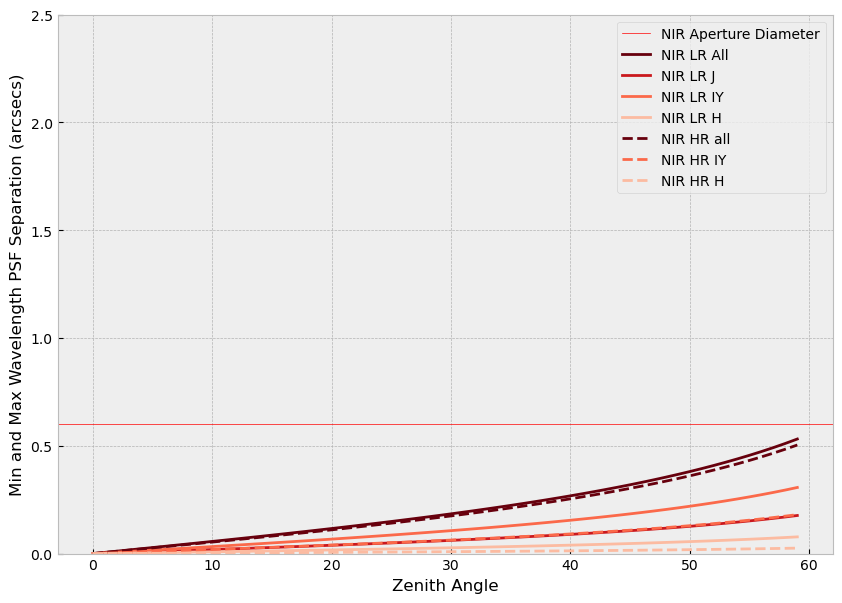

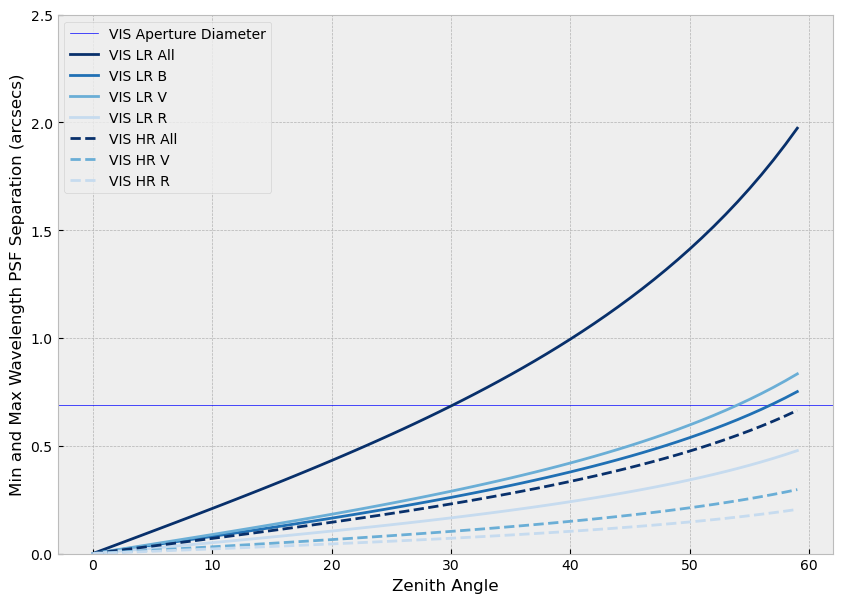

In [63]:
fig, ax = plt.subplots(figsize=(10,7))
plt.axhline(0.6,color='red',linewidth=0.5,label='NIR Aperture Diameter')
plt.plot(angles,NIR_LR_sep[0],label="NIR LR All",color=cmap4_1.to_rgba(3+1))
plt.plot(angles,NIR_LR_sep[1],label="NIR LR J",color=cmap4_1.to_rgba(2+1))
plt.plot(angles,NIR_LR_sep[2],label="NIR LR IY",color=cmap4_1.to_rgba(1+1))
plt.plot(angles,NIR_LR_sep[3],label="NIR LR H",color=cmap4_1.to_rgba(0+1))
plt.plot(angles,NIR_HR_sep[0],label="NIR HR all",color=cmap4_1.to_rgba(3+1),linestyle='--')
plt.plot(angles,NIR_HR_sep[1],label="NIR HR IY",color=cmap4_1.to_rgba(1+1),linestyle='--')
plt.plot(angles,NIR_HR_sep[2],label="NIR HR H",color=cmap4_1.to_rgba(0+1),linestyle='--')
plt.ylabel("Min and Max Wavelength PSF Separation (arcsecs)")
plt.xlabel("Zenith Angle")
plt.legend()
plt.ylim(0,2.5)

fig, ax = plt.subplots(figsize=(10,7))
plt.axhline(0.69,color='blue',linewidth=0.5,label='VIS Aperture Diameter')
plt.plot(angles,VIS_LR_sep[0],label="VIS LR All",color=cmap4_2.to_rgba(3+1))
plt.plot(angles,VIS_LR_sep[1],label="VIS LR B",color=cmap4_2.to_rgba(2+1))
plt.plot(angles,VIS_LR_sep[2],label="VIS LR V",color=cmap4_2.to_rgba(1+1))
plt.plot(angles,VIS_LR_sep[3],label="VIS LR R",color=cmap4_2.to_rgba(0+1))
plt.plot(angles,VIS_HR_sep[0],label="VIS HR All",color=cmap4_2.to_rgba(3+1),linestyle='--')
plt.plot(angles,VIS_HR_sep[1],label="VIS HR V",color=cmap4_2.to_rgba(1+1),linestyle='--')
plt.plot(angles,VIS_HR_sep[2],label="VIS HR R",color=cmap4_2.to_rgba(0+1),linestyle='--')
plt.ylabel("Min and Max Wavelength PSF Separation (arcsecs)")
plt.xlabel("Zenith Angle")
plt.legend()
plt.ylim(0,2.5)

## Transmission Snapshots
Transmission vs Wavelength for various Airmass


In [13]:
def trans_plot(input_parameters,output_parameters,conditions,normalise="none"):
    """
    Plots the wavelength vs transmission graph 
    Comes after load_wave, load_airmasses, calculate_snapshifts, calculate_snaptransmissions

    INPUTS:
    normalise: string, "none", "zenith", "centre", "both"
        what to normalise the transmission to; either no normalisation, relative to zenith, relative to transmission or fibre centre wavelength,
        or both the latter

    OUTPUTS:
    Graphs:
        corresponding graph
    """
    airmasses=output_parameters['airmasses']
    ZA_range=input_parameters['ZA_range']
    HA_range=input_parameters['HA_range']
    
    wave_wavelengths=output_parameters['wave_wavelengths']
    fibre_diameter=output_parameters['fibre_diameter']
    wave_transmissions=output_parameters['wave_transmissions']

    fibrecentre_waveref=input_parameters['fibrecentre_waveref']
    guide_waveref=input_parameters['guide_waveref']
    median_FWHM=input_parameters['median_FWHM']
    median_FWHM_lambda=input_parameters['median_FWHM_lambda']
    kolb_factor=input_parameters['kolb_factor']
    regime=input_parameters['regime']
    res=input_parameters['res']
    k_lim=input_parameters['k_lim']
    FWHM_change=input_parameters['FWHM_change']
    scale=input_parameters['scale']
    method=input_parameters['method']
    beta=input_parameters['beta']
    band=input_parameters['band']
    reposition=input_parameters['reposition']
    targ_dec=input_parameters['targ_dec']

    weights = np.arange(1, len(airmasses)+1)
    norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
    if regime=="NIR":
        cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Reds)
    elif regime=="VIS":
        cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)

    if ZA_range !=[]: #Zenith angle plots
        fig, ax = plt.subplots(figsize=(7,5))
        plt.axvline(fibrecentre_waveref.value*1000,color='black',linewidth=0.5,label='Aperture Centre Wavelength')

        if normalise == "zenith":
            print("Normalised to Zenith Transmission")
            if FWHM_change==True:
                zenith_FWHMs=trans_calc.calculate_FWHM(wave_wavelengths,1,median_FWHM,median_FWHM_lambda,kolb_factor)
            else:
                zenith_FWHMs=np.full(len(wave_wavelengths),median_FWHM) * u.arcsec
            zenith_centre_shift=atm_diff.diff_shift(fibrecentre_waveref,1,guide_waveref,conditions)
            zenith_shifts=atm_diff.diff_shift(wave_wavelengths,1,guide_waveref,conditions)-zenith_centre_shift
            if method == "analytical":
                zenith_transmission = trans_calc.analytical_gaussian(fibre_diameter,zenith_FWHMs,zenith_shifts,k_lim)
            if method == "numerical gaussian":
                zenith_transmission = []
                for i in range(0,len(zenith_FWHMs)):
                    zenith_transmission.append(trans_calc.numerical_gaussian(fibre_diameter,zenith_FWHMs[i],zenith_shifts[i],scale))
            if method == "numerical moffat":
                zenith_transmission = []
                for i in range(0,len(zenith_FWHMs)):
                    zenith_transmission.append(trans_calc.numerical_moffat(fibre_diameter,zenith_FWHMs[i],zenith_shifts[i],scale,beta=beta))
            for i in range(0,len(wave_transmissions)):
                plt.plot(wave_wavelengths,np.array(wave_transmissions[i])/np.array(zenith_transmission),label='Zenith Angle = %2.0f' %(ZA_range[i]),color=cmap.to_rgba(i+1))    
            plt.ylabel("Transmission Relative to Zenith")

        if normalise == "centre":
            print("Normalised to Reference Wavelength Transmission")
            peak = np.where(wave_wavelengths.value==fibrecentre_waveref.value*1000)[0][0]          
            for i in range(0,len(wave_transmissions)):
                plt.plot(wave_wavelengths,np.array(wave_transmissions[i])/np.array(wave_transmissions[i][peak]),label='Zenith Angle = %2.0f' %(ZA_range[i]),color=cmap.to_rgba(i+1))    
            plt.ylabel("Transmission Relative to Aperture Centre Wavelength")

        if normalise == "none":
            print("No Normalisation, Raw Transmission")
            for i in range(0,len(wave_transmissions)):
                plt.plot(wave_wavelengths,np.array(wave_transmissions[i]),label='Zenith Angle = %2.0f' %(ZA_range[i]),color=cmap.to_rgba(i+1))
            plt.ylabel("Transmission")

        plt.xlabel("Wavelength (nm)")
        plt.title('Aperture Centre = %s, %s %s' %(fibrecentre_waveref,regime,band))
        plt.ylim(0,1.3)
        plt.legend()
        
        #plt.savefig("graphs/Snapshot_"+str(band)+str(regime)+".png",dpi=600,bbox_inches='tight')


Zenith Angles Used
Normalised to Reference Wavelength Transmission


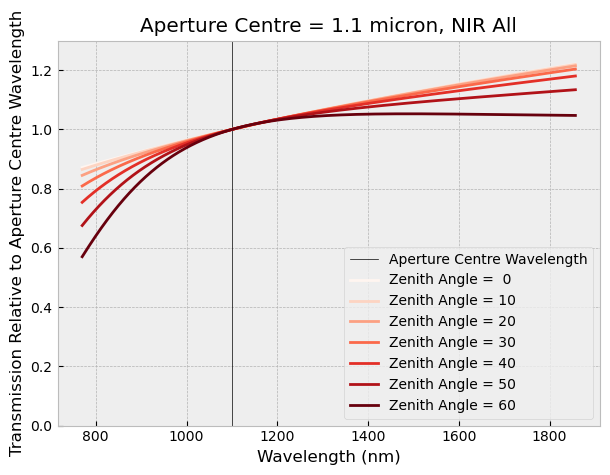

In [14]:
analysis=AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
analysis.load_airmasses(ZA_range=[0,10,20,30,40,50,60])
analysis.calculate_shifts(fibrecentre_waveref = 1.1 * u.micron,reposition=True, guide_waveref=5 * u.micron)
analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01, beta=2.5)
trans_plot(analysis.input_parameters,analysis.output_parameters,conditions,normalise="centre")

Zenith Angles Used
Normalised to Reference Wavelength Transmission
Zenith Angles Used
Normalised to Reference Wavelength Transmission
Zenith Angles Used
Normalised to Reference Wavelength Transmission


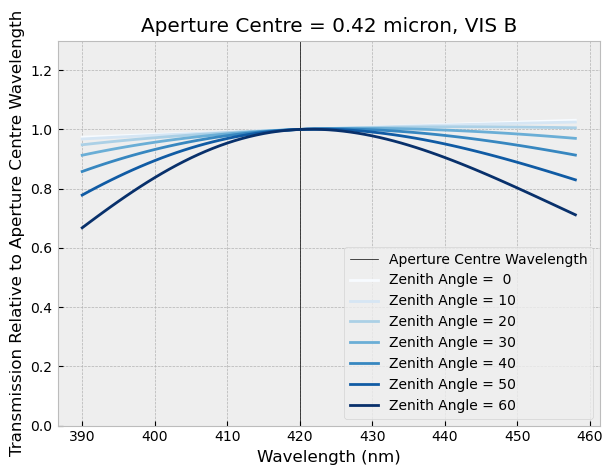

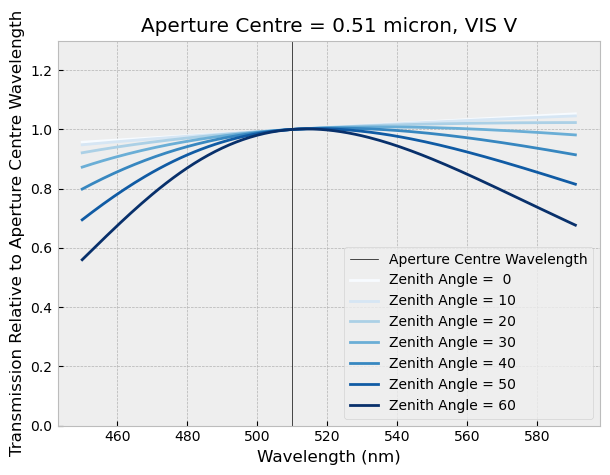

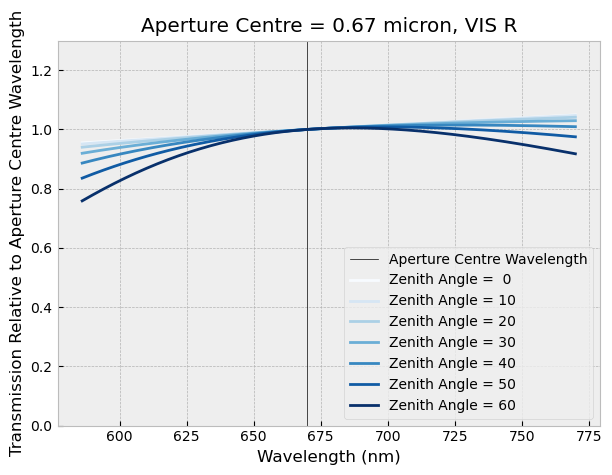

In [15]:
analysis=AD_analysis()
analysis.load_wave('LR','VIS','B','B',sampling=1 * u.nm)
analysis.load_airmasses(ZA_range=[0,10,20,30,40,50,60])
analysis.calculate_shifts(fibrecentre_waveref = 0.42 * u.micron,reposition=True, guide_waveref=0.42 * u.micron)
analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01, beta=2.5)
trans_plot(analysis.input_parameters,analysis.output_parameters,conditions,normalise="centre")

analysis=AD_analysis()
analysis.load_wave('LR','VIS','V','V',sampling=1 * u.nm)
analysis.load_airmasses(ZA_range=[0,10,20,30,40,50,60])
analysis.calculate_shifts(fibrecentre_waveref = 0.51 * u.micron,reposition=True, guide_waveref=0.51 * u.micron)
analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01, beta=2.5)
trans_plot(analysis.input_parameters,analysis.output_parameters,conditions,normalise="centre")

analysis=AD_analysis()
analysis.load_wave('LR','VIS','R','R',sampling=1 * u.nm)
analysis.load_airmasses(ZA_range=[0,10,20,30,40,50,60])
analysis.calculate_shifts(fibrecentre_waveref = 0.67 * u.micron,reposition=True, guide_waveref=0.67 * u.micron)
analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01, beta=2.5)
trans_plot(analysis.input_parameters,analysis.output_parameters,conditions,normalise="centre")

